<a href="https://colab.research.google.com/github/jaehyun99/Computer_Vision/blob/main/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 폴더 버튼을 누르셔도 되고, 해당 코드를 수행하셔도 google drive와 mount가 됩니다.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 이미지 읽기 및 변수에 저장

targetimg = cv2.imread("drive/MyDrive/PR201910807/images/lab02_people.jpg")  ##목표 이미지
modelimg = cv2.imread("drive/MyDrive/PR201910807/images/lab02_modelpatch.jpg") ##피부색 이미지

Max value of Model hist before normalize 2041.0
Max value of Target hist before normalize 82587.0
Max value of Model hist 0.008504166666666667
Max value of Target hist 0.04588166666666667


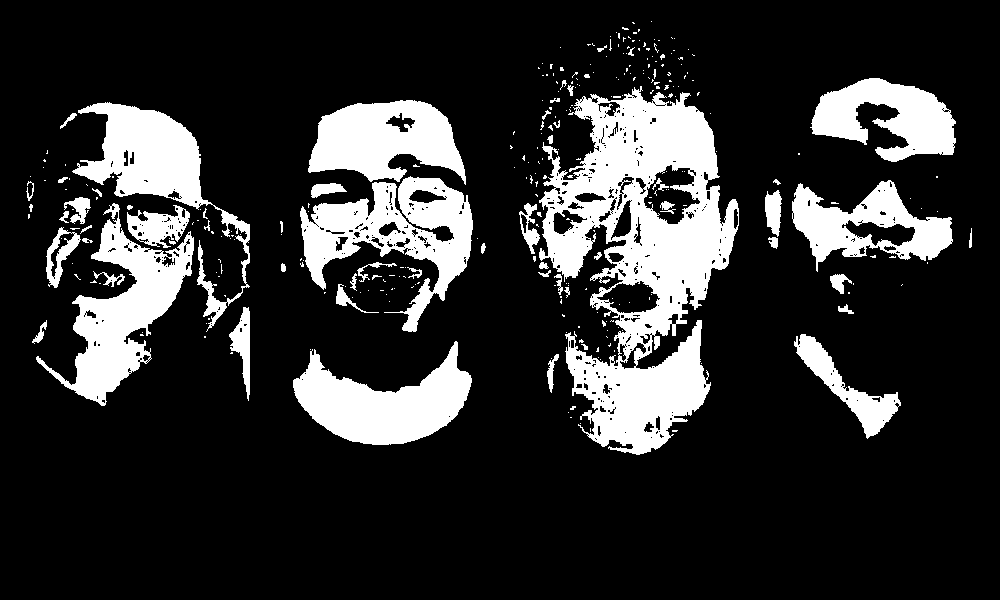

In [ ]:
## YCbCr 채널에서 Cb, Cr 사용

modelimg_ycbcr = cv2.cvtColor(modelimg, cv2.COLOR_BGR2YCrCb)
modelhist_ycbcr = cv2.calcHist([modelimg_ycbcr], [1,2], None,[256,256],[0,256,0,256])


targetimg_ycbcr = cv2.cvtColor(targetimg, cv2.COLOR_BGR2YCrCb)
targethist_ycbcr = cv2.calcHist([targetimg_ycbcr], [1, 2], None, [256, 256], [0,256,0,256])   ## Cb와 Cr에 대해 생성한 2D 히스토그램


## 정규화 과정

print("Max value of Model hist before normalize {}".format(modelhist_ycbcr.max()))
print("Max value of Target hist before normalize {}".format(targethist_ycbcr.max()))
modelhist_ycbcr = modelhist_ycbcr/modelimg_ycbcr.size
targethist_ycbcr = targethist_ycbcr/targetimg_ycbcr.size
print("Max value of Model hist {}".format(modelhist_ycbcr.max()))
print("Max value of Target hist {}".format(targethist_ycbcr.max()))

## 비율 히스토그램 생성 과정

hist_r = modelhist_ycbcr/ (targethist_ycbcr + 1e-7)
hist_r = np.minimum(hist_r, 1.0)


height, width = targetimg_ycbcr.shape[0], targetimg_ycbcr.shape[1]
output = np.zeros_like(targetimg_ycbcr, dtype='float32')      #출력에 사용할 2D array을 목표 이미지와 같은 크기로 생성

## 목표 이미지의 모든 pixel을 접근하여 비율 히스토그램의 값을 output arrray에 저장하는 과정

for i in range(height):
  for j in range(width):
    cb_val = targetimg_ycbcr[i, j, 1]    ## YCbCr color space의 목표이미지에서 (i, j) 위치의 Cb 값 저장
    cr_val = targetimg_ycbcr[i, j, 2]    ## YCbCr color space의 목표이미지에서 (i, j) 위치의 Cr 값 저장
    confidence = hist_r[cb_val, cr_val]   ## 비율 히스토그램에서 해당 (Cb, Cr) 의 값 저장
    output[i,j] = confidence        ## output array의 해당 위치 (i, j) 에 비율 히스토그램에서 찾은 confidence 저장

## confidence는 0.0~1.0 사이의 값이기 때문에 threshold 값(0.02)을 설정하여 보다 클 경우 255, 작을 경우 0으로 binaray output으로 변경
ret, masked = cv2.threshold(output, 0.02, 255, cv2.THRESH_BINARY)
cv2_imshow(masked)

In [ ]:
kernel = np.ones((5,5))

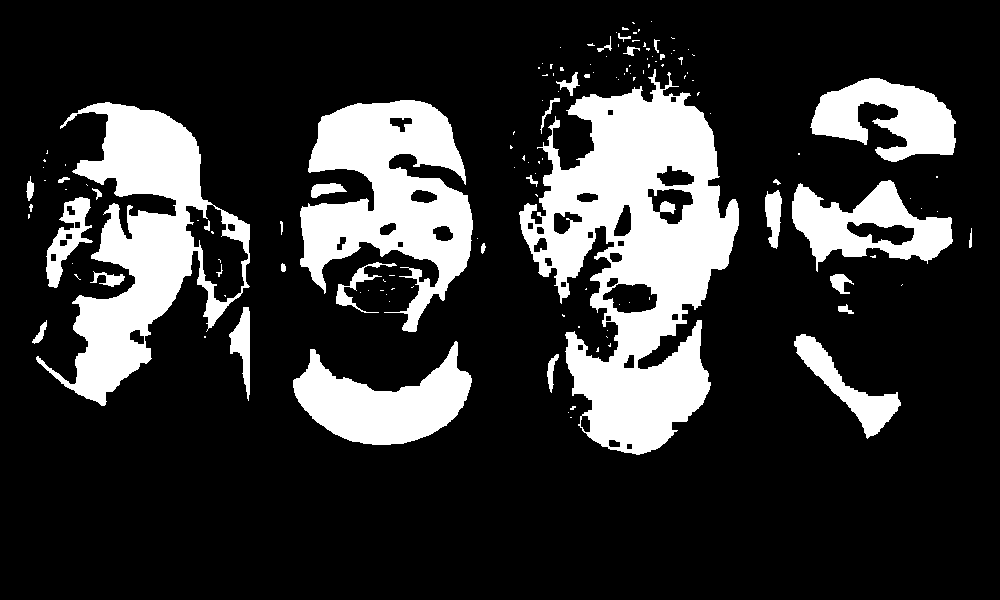

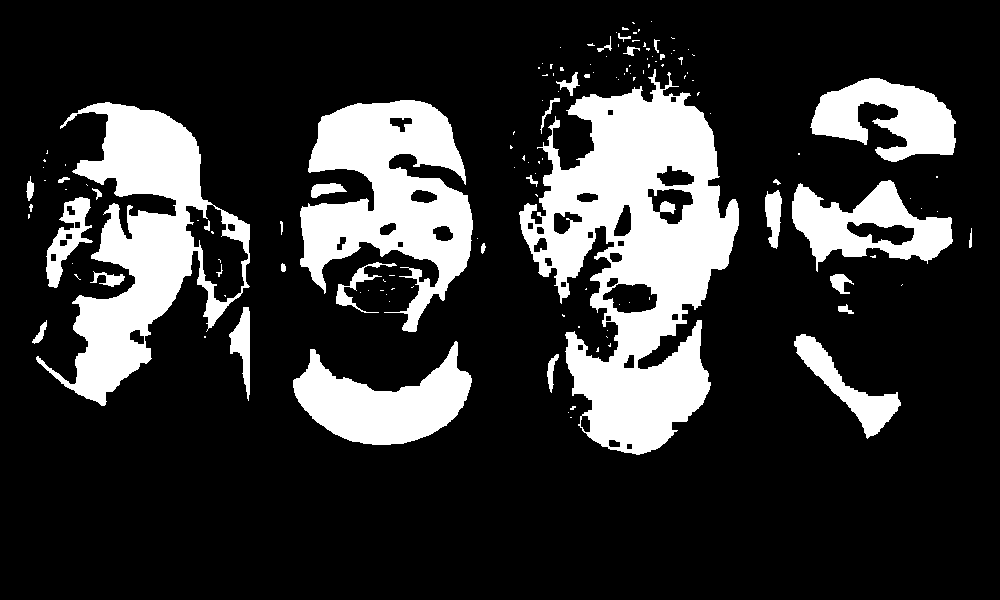

In [ ]:
morphed_close = cv2.morphologyEx(masked, cv2.MORPH_CLOSE, kernel)

morphed_dilate= cv2.dilate(masked, kernel) #팽창
my_close = cv2.erode(morphed_dilate, kernel) #침식

cv2_imshow(morphed_close)
cv2_imshow(my_close)